# Challenge

## First Question

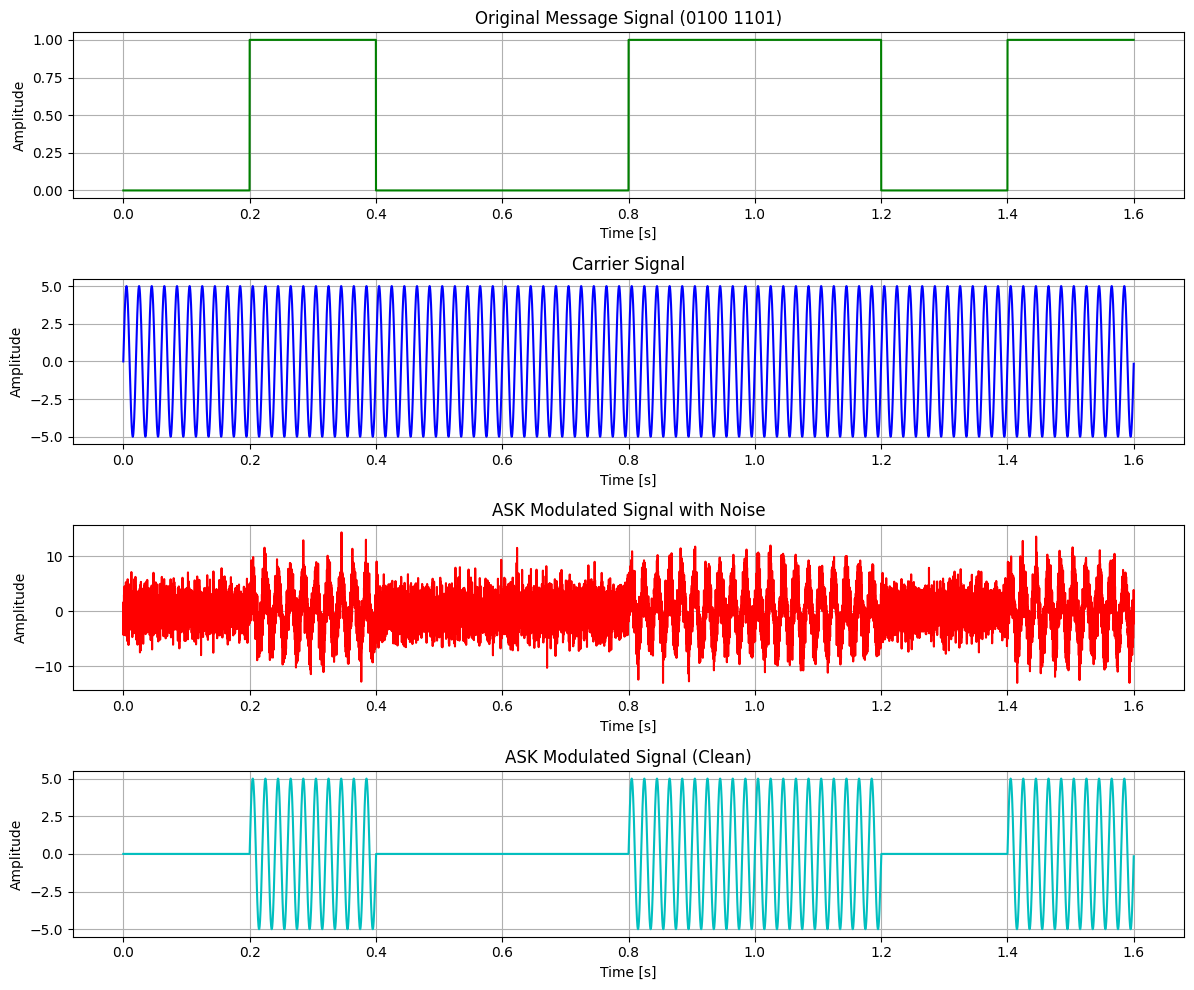

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 10000  # Sampling frequency
duration_per_bit = 0.2  # Duration of each bit in seconds
t = np.arange(0, duration_per_bit * 8, 1/fs)  # Time vector for 8 bits
f_carrier = 50  # Carrier frequency in Hz
amplitude_carrier = 5  # Carrier signal amplitude
amplitude_noise = 2.5  # Noise amplitude

# Binary message signal
message_bits = [0, 1, 0, 0, 1, 1, 0, 1]  # Message: [0100 1101]
message_signal = np.repeat(message_bits, int(fs * duration_per_bit))  # Convert message to a signal

# Generate carrier signal
carrier = amplitude_carrier * np.sin(2 * np.pi * f_carrier * t)

# Generate ASK signal (Amplitude Shift Keying)
ask_signal = message_signal * carrier

# Generate two types of noise
noise1 = amplitude_noise * np.random.normal(0, 1, len(t))
noise2 = amplitude_noise * np.random.normal(0, 1, len(t))

# Add noise to the ASK signal in alternating patterns every 2 carrier cycles
samples_per_cycle = fs // f_carrier  # Samples in one carrier cycle
for i in range(0, len(t) // samples_per_cycle, 4):  # Every 4 cycles (two blocks of two cycles)
    # Noise1 for 2 cycles
    start_idx = i * samples_per_cycle
    end_idx = start_idx + 2 * samples_per_cycle
    ask_signal[start_idx:end_idx] += noise1[start_idx:end_idx]
    
    # Noise2 for the next 2 cycles
    start_idx = end_idx
    end_idx = start_idx + 2 * samples_per_cycle
    ask_signal[start_idx:end_idx] += noise2[start_idx:end_idx]

# Plotting the signals
plt.figure(figsize=(12, 10))

# Original message signal
plt.subplot(4, 1, 1)
plt.plot(t, message_signal, label="Message Signal", color='g')
plt.title("Original Message Signal (0100 1101)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Carrier signal
plt.subplot(4, 1, 2)
plt.plot(t, carrier, label="Carrier Signal", color='b')
plt.title("Carrier Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# ASK Modulated Signal with Noise
plt.subplot(4, 1, 3)
plt.plot(t, ask_signal, label="ASK Signal with Noise", color='r')
plt.title("ASK Modulated Signal with Noise")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# ASK Modulated Signal without Noise for comparison
ask_signal_clean = message_signal * carrier
plt.subplot(4, 1, 4)
plt.plot(t, ask_signal_clean, label="ASK Signal (Clean)", color='c')
plt.title("ASK Modulated Signal (Clean)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


## Second Question

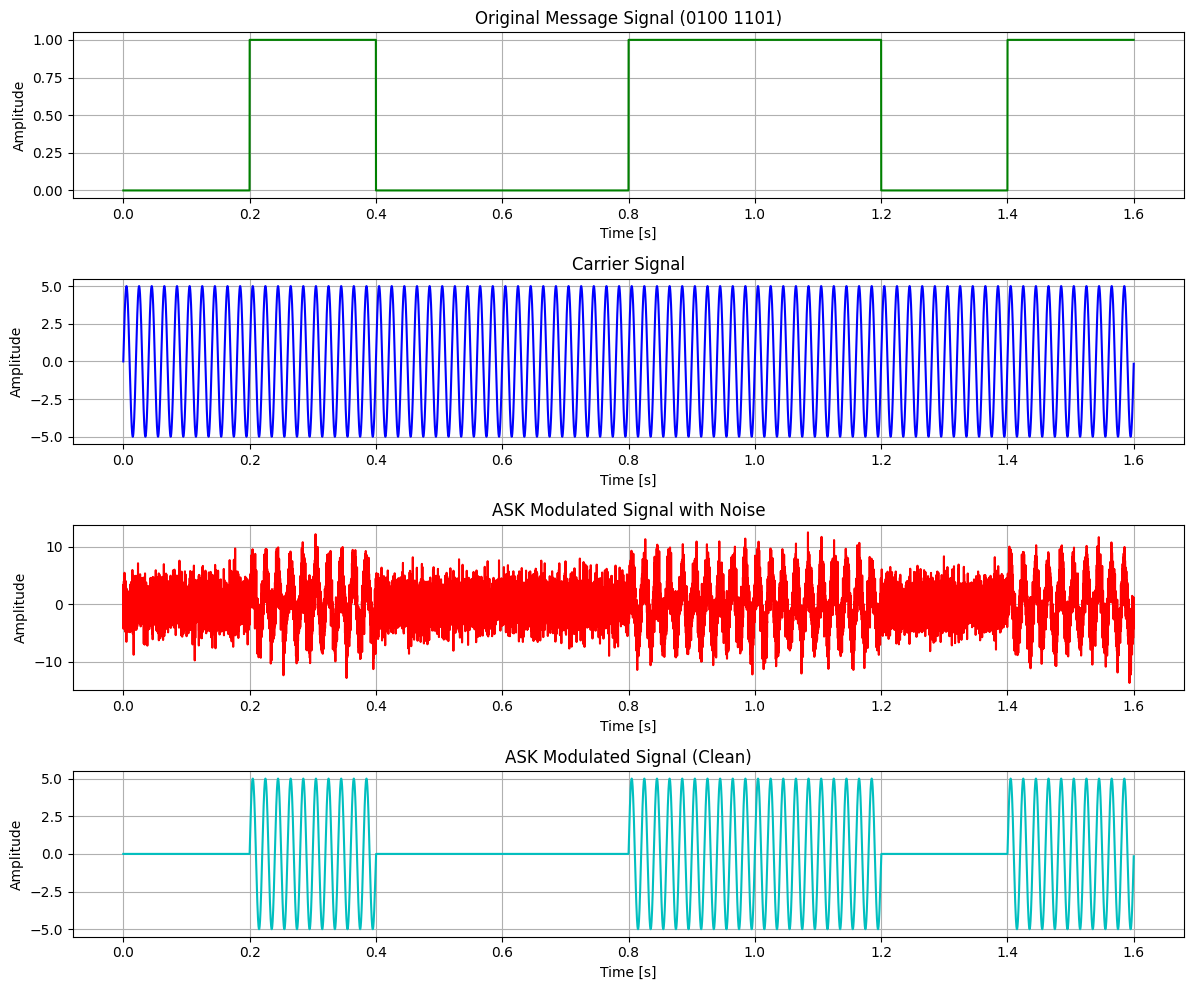

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 10000  # Sampling frequency
duration_per_bit = 0.2  # Duration of each bit in seconds
t = np.arange(0, duration_per_bit * 8, 1/fs)  # Time vector for 8 bits
f_carrier = 50  # Carrier frequency in Hz
amplitude_carrier = 5  # Carrier signal amplitude
amplitude_noise = 2.5  # Noise amplitude

# Binary message signal
message_bits = [0, 1, 0, 0, 1, 1, 0, 1]  # Message: [0100 1101]
message_signal = np.repeat(message_bits, int(fs * duration_per_bit))  # Convert message to a signal

# Generate carrier signal
carrier = amplitude_carrier * np.sin(2 * np.pi * f_carrier * t)

# Generate ASK signal (Amplitude Shift Keying)
ask_signal = message_signal * carrier

# Generate modular noise with amplitude 2.5
modulation_frequency = 1  # Frequency of noise modulation in Hz
modulated_noise = amplitude_noise * np.sin(2 * np.pi * modulation_frequency * t)

# Add modular noise to the ASK signal
ask_signal += modulated_noise

# Plotting the signals
plt.figure(figsize=(12, 10))

# Original message signal
plt.subplot(4, 1, 1)
plt.plot(t, message_signal, label="Message Signal", color='g')
plt.title("Original Message Signal (0100 1101)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Carrier signal
plt.subplot(4, 1, 2)
plt.plot(t, carrier, label="Carrier Signal", color='b')
plt.title("Carrier Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# ASK Modulated Signal with Modular Noise
plt.subplot(4, 1, 3)
plt.plot(t, ask_signal, label="ASK Signal with Modular Noise", color='r')
plt.title("ASK Modulated Signal with Modular Noise")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# ASK Modulated Signal without Noise for comparison
ask_signal_clean = message_signal * carrier
plt.subplot(4, 1, 4)
plt.plot(t, ask_signal_clean, label="ASK Signal (Clean)", color='c')
plt.title("ASK Modulated Signal (Clean)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


## Third Question

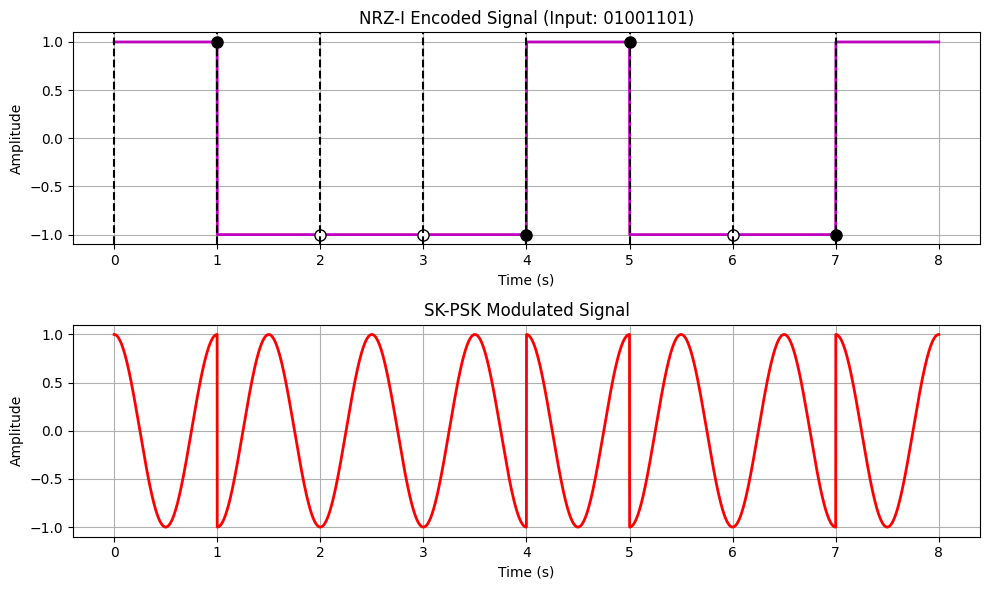

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
input_data = '01001101'  # Input binary data
amplitude = 1            # Integer amplitude
bit_rate = 1             # Bits per second (adjust as needed)
fs = 1000                # Sampling frequency (samples per second)
T = 1 / bit_rate         # Time period of a bit
num_samples_per_bit = int(fs * T)
total_samples = num_samples_per_bit * len(input_data)

# Time axis
t = np.linspace(0, T * len(input_data), total_samples)

# NRZ-I Encoding
def nrzi_encoding(data):
    output = []
    current_level = amplitude  # Start with high level (1 or -1)
    encoded_bits = []

    for bit in data:
        if bit == '1':
            current_level *= -1  # Invert level on '1'
        encoded_bits.append(current_level)  # Save the level for each bit
        output.extend([current_level] * num_samples_per_bit)  # Extend for plotting each bit

    return np.array(output), encoded_bits

# Modulate the signal (Phase Shift Keying - PSK)
def sk_psk_modulation(encoded_data):
    carrier_frequency = 2 * np.pi  # Carrier frequency for PSK modulation
    modulated_signal = encoded_data * np.cos(carrier_frequency * t)
    return modulated_signal

# NRZ-I encoding of input data
encoded_signal, encoded_bits = nrzi_encoding(input_data)

# SK-PSK modulation
modulated_signal = sk_psk_modulation(encoded_signal)

# Create the time markers for each bit for plotting
bit_time = np.arange(0, len(input_data)) * T

# Plot the result
plt.figure(figsize=(10, 6))

# Plot NRZ-I signal
plt.subplot(2, 1, 1)
plt.plot(t, encoded_signal, 'm', linewidth=2, label="NRZ-I")

# Adding markers to indicate state changes (bubbles before the transition)
for i in range(1, len(input_data)):  # Start from the second bit to capture transitions
    if input_data[i] == '1':  # Inversion occurs on '1'
        # Show bubble at the previous level before the inversion
        plt.plot(bit_time[i], encoded_bits[i-1], 'ko', markersize=8)  # Filled circle before transition
    else:
        plt.plot(bit_time[i], encoded_bits[i-1], 'wo', markersize=8, markeredgecolor='black')  # Unfilled circle at steady state

# Adding grid lines for bit boundaries
for i in range(len(input_data)):
    plt.axvline(x=i * T, color='black', linestyle='--')

# Labeling for NRZ-I
plt.title("NRZ-I Encoded Signal (Input: 01001101)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Adjust the limits so the signal sticks to the border
plt.ylim([-1.1, 1.1])

# Plot SK-PSK modulated signal
plt.subplot(2, 1, 2)
plt.plot(t, modulated_signal, 'r', linewidth=2)
plt.title("SK-PSK Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Adjust the limits to make it fit within the borders
plt.ylim([-1.1, 1.1])

# Final layout and show plot
plt.tight_layout()
plt.show()
